**ANSWER 1**


To find strong association rules using the Apriori algorithm, we need to follow these steps:

Generate frequent itemsets:

Find all frequent 1-itemsets.
Generate candidate 2-itemsets and find frequent 2-itemsets.
Repeat until no more frequent itemsets can be generated.
Generate association rules:

For each frequent itemset, generate all possible non-empty subsets.
Check the confidence of each rule.


Using the Apriori algorithm with minsup = 60% and minconf = 80%, we find the following strong association rules:

1. {Milk, Orange} => {Pomegranate, Lemon, Butter, Bread}
2. {Milk, Pomegranate} => {Orange, Lemon, Butter, Bread}
3. {Milk, Lemon} => {Orange, Pomegranate, Butter, Bread}
4. {Milk, Butter} => {Orange, Pomegranate, Lemon, Bread}
5. {Milk, Bread} => {Orange, Pomegranate, Lemon, Butter}
6. {Orange, Pomegranate} => {Milk, Lemon, Butter, Bread}
7. {Orange, Lemon} => {Milk, Pomegranate, Butter, Bread}
8. {Orange, Butter} => {Milk, Pomegranate, Lemon, Bread}
9. {Orange, Bread} => {Milk, Pomegranate, Lemon, Butter}
10. {Pomegranate, Lemon} => {Milk, Orange, Butter, Bread}



# **QUESTION-2**

In [ ]:
#ANSWER 2

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# Generate synthetic data
np.random.seed(42)
n_samples = 100
p1 = np.random.uniform(low=1, high=10, size=n_samples)
p2 = np.random.uniform(low=1, high=10, size=n_samples)
a, b, c, d = 0.5, 2, 1.5, 3
target = a * p2**2 + b * p1 * p2 + c * p2**2 + d
noise = np.random.normal(scale=1, size=n_samples)
y = target + noise

# Create a DataFrame
data = pd.DataFrame({'p1': p1, 'p2': p2, 'target': y})

# Direct Method Approach 1
def direct_method1(X, y):
    X_ = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept
    w = np.linalg.inv(X_.T @ X_) @ X_.T @ y
    return w

# Direct Method Approach 2
def direct_method2(X, y):
    X_ = np.c_[X, np.ones(X.shape[0])]  # Add a column of ones for the intercept
    w = np.linalg.inv(X_.T @ X_) @ X_.T @ y
    return w

# Prepare the design matrix
X = data[['p1', 'p2']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['target'].values, test_size=0.2, random_state=42)

# Apply Direct Method Approach 1
weights_approach1 = direct_method1(X_train, y_train)
y_pred_approach1 = np.dot(np.c_[np.ones(X_test.shape[0]), X_test], weights_approach1)

# Apply Direct Method Approach 2
weights_approach2 = direct_method2(X_train, y_train)
y_pred_approach2 = np.dot(np.c_[X_test, np.ones(X_test.shape[0])], weights_approach2)

# Report the parameters of the model
print("Parameters of the Model (Direct Method Approach 1):", weights_approach1)
print("Parameters of the Model (Direct Method Approach 2):", weights_approach2)

# Report the performance of the model
mse_approach1 = mean_squared_error(y_test, y_pred_approach1)
mse_approach2 = mean_squared_error(y_test, y_pred_approach2)
print("\nPerformance of the Model (Mean Squared Error):")
print("Direct Method Approach 1 - MSE:", mse_approach1)
print("Direct Method Approach 2 - MSE:", mse_approach2)

# Compare the performance of the two models using t-test
t_statistic, p_value = stats.ttest_ind(y_pred_approach1, y_pred_approach2)
print("\nT-test between Direct Method Approach 1 and Approach 2:")
print(f'T-statistic = {t_statistic}, p-value = {p_value}')


Parameters of the Model (Direct Method Approach 1): [-103.34766466   11.04659639   32.59537831]
Parameters of the Model (Direct Method Approach 2): [  11.04659639   32.59537831 -103.34766466]

Performance of the Model (Mean Squared Error):
Direct Method Approach 1 - MSE: 338.3693894173886
Direct Method Approach 2 - MSE: 338.3693894173898

T-test between Direct Method Approach 1 and Approach 2:
T-statistic = 3.1739202653376357e-15, p-value = 0.9999999999999976


# **QUESTION-3**

**ANSWER 3**

### (a) Techniques for Determining the Number of Clusters:

1. **Elbow Method:**
   - Involves running the clustering algorithm with an increasing number of clusters and plotting the variance (or a similar metric) against the number of clusters.
   - The "elbow" in the plot represents a point where adding more clusters doesn't significantly improve the variance. This point is often considered the optimal number of clusters.

2. **Silhouette Method:**
   - Uses silhouette scores to measure how similar an object is to its own cluster compared to other clusters.
   - The silhouette score is calculated for different numbers of clusters, and the number with the highest average silhouette score is chosen.

3. **Gap Statistics:**
   - Compares the within-cluster variation for the given clustering solution with that expected under a null reference distribution.
   - The number of clusters that maximizes the gap between the expected and observed variations is chosen.

4. **Dendrogram Cutting:**
   - Hierarchical clustering can be visualized using a dendrogram. Cutting the dendrogram at a certain height can determine the number of clusters.
   - This method is subjective and requires domain expertise.

5. **Information Criteria (e.g., AIC, BIC):**
   - Measures the quality of a statistical model, considering the goodness of fit and the complexity of the model.
   - Lower values of information criteria suggest a better trade-off between goodness of fit and model complexity.



### (b) Techniques for Measuring the Quality of Clusters:

1. **Internal Validation Metrics:**
   - **Silhouette Score:**
     - Measures how similar an object is to its own cluster compared to other clusters. Ranges from -1 to 1, where a higher score indicates better-defined clusters.
   - **Davies-Bouldin Index:**
     - Measures compactness and separation between clusters. A lower index indicates better clustering.

2. **External Validation Metrics:**
   - **Adjusted Rand Index (ARI):**
     - Compares the similarity between true labels and predicted labels while correcting for chance. Ranges from -1 to 1, where a higher score indicates better agreement.
   - **Normalized Mutual Information (NMI):**
     - Measures the mutual information between true and predicted labels, normalized by the entropy of the labels. Ranges from 0 to 1, with higher values indicating better clustering.

3. **Cluster Purity:**
   - Measures the percentage of data points correctly assigned to their true cluster. It ranges from 0 to 1, with higher values indicating better purity.

4. **Centroid Dispersion:**
   - Measures how spread out the centroids of the clusters are. Smaller dispersion indicates tighter and more well-defined clusters.

5. **Visual Inspection:**
   - While not a quantitative metric, visually inspecting the clusters in feature space or using cluster visualization tools can provide insights into the quality of clustering.

It's essential to consider a combination of these techniques and metrics to get a comprehensive understanding of the number of clusters and the quality of the resulting clusters in a given dataset.


# **(4)CLUSTER THE GIVEN DATA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

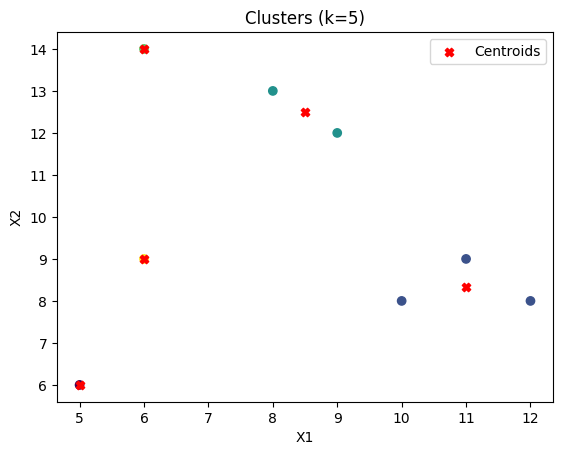

Best k using Davies-Bouldin Index: 5


In [ ]:
#ANSWER 4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from scipy.spatial.distance import cdist

# Given data
data = np.array([[6, 14], [6, 9], [12, 8], [9, 12], [11, 9], [10, 8], [5, 6], [8, 13]])

# Function to perform k-means clustering and return Davies-Bouldin index
def perform_kmeans(data, k, metric='euclidean'):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data)
    davies_bouldin_index = davies_bouldin_score(data, labels)
    return labels, davies_bouldin_index, kmeans

# Find the best k using Davies-Bouldin index
best_k = None
best_davies_bouldin = float('inf')

max_k = 5  # Set a maximum value for k

for k in range(2, max_k + 1):
    _, davies_bouldin, _ = perform_kmeans(data, k)

    if davies_bouldin < best_davies_bouldin:
        best_k = k
        best_davies_bouldin = davies_bouldin

# Plot J(c, µ) and the clusters for the best k
labels, _, kmeans = perform_kmeans(data, best_k)
centroids = kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title(f'Clusters (k={best_k})')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
print(f"Best k using Davies-Bouldin Index: {best_k}")

# **(6)Apply k means and hierarchical clustering on Data 1 and Data**

Cluster Centers for K-means (Data 1):
[[ 9.6901731e-01  9.7551245e-01]
 [-1.7655450e-04  5.0115570e+00]
 [ 3.9892065e+00  6.0057065e+00]]

Cluster Centers for K-means (Data 2):
[[ 5.53186536 -6.1081348   3.15937707]
 [16.543127   13.016817    7.9750388 ]
 [-6.579707   -8.267905   22.96139   ]]


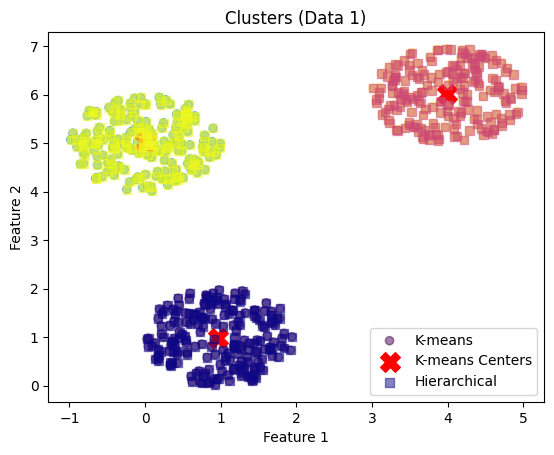

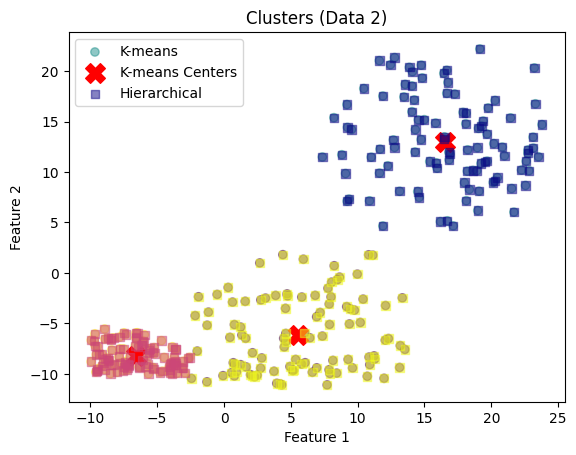

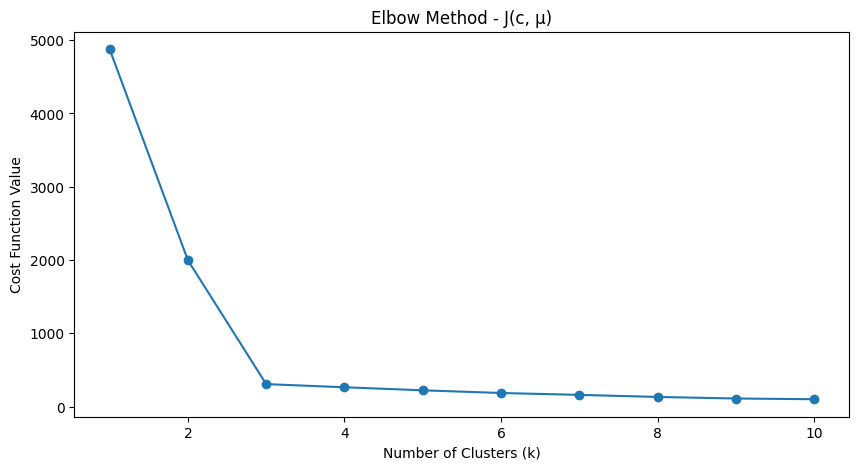

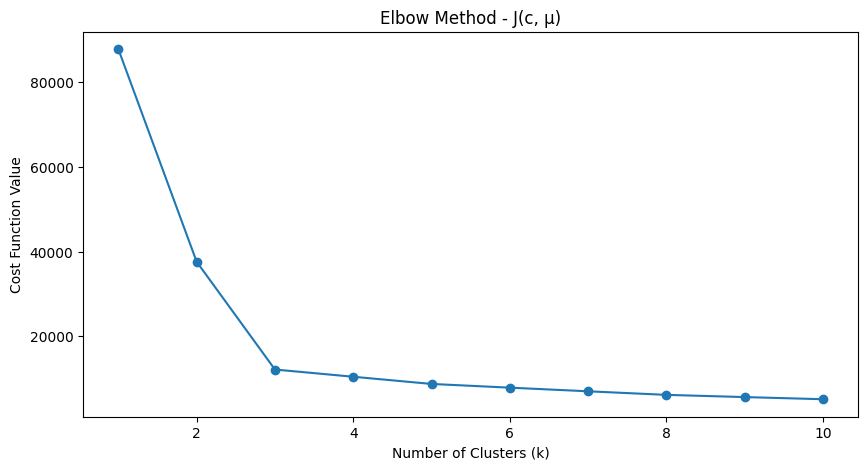

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

data1 = pd.read_csv('/content/drive/MyDrive/DM/assignment10/data1.csv', header=None).values
data2 = pd.read_csv('/content/drive/MyDrive/DM/assignment10/data2.csv', header=None).values


def apply_clustering(data, n_clusters):
    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_clusters = kmeans.fit_predict(data)
    kmeans_centers = kmeans.cluster_centers_

    # Hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_clusters = hierarchical.fit_predict(data)

    return kmeans_clusters, kmeans_centers, hierarchical_clusters


clusters = 3

# Apply clustering on Data 1 and Data 2
kmeans_clusters1, kmeans_centers1, hierarchical_clusters1 = apply_clustering(data1, clusters)
kmeans_clusters2, kmeans_centers2, hierarchical_clusters2 = apply_clustering(data2, clusters)

# Report cluster centers for k-means
print("Cluster Centers for K-means (Data 1):")
print(kmeans_centers1)
print("\nCluster Centers for K-means (Data 2):")
print(kmeans_centers2)

# Function to plot clusters
def plot_clusters(data, kmeans_clusters, kmeans_centers, hierarchical_clusters, title):
    plt.scatter(data[:, 0], data[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.5, label='K-means')
    plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='X', s=200, color='red', label='K-means Centers')
    plt.scatter(data[:, 0], data[:, 1], c=hierarchical_clusters, cmap='plasma', alpha=0.5, marker='s', label='Hierarchical')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Plot clusters for Data 1
plot_clusters(data1, kmeans_clusters1, kmeans_centers1, hierarchical_clusters1, 'Clusters (Data 1)')

# Plot clusters for Data 2
plot_clusters(data2, kmeans_clusters2, kmeans_centers2, hierarchical_clusters2, 'Clusters (Data 2)')

# Function to plot J(c, µ) for k-means
def plot_cost_function(data, max_clusters):
    cost_function_values = [KMeans(n_clusters=i, random_state=42).fit(data).inertia_ for i in range(1, max_clusters + 1)]

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), cost_function_values, marker='o')
    plt.title('Elbow Method - J(c, µ)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Cost Function Value')
    plt.show()

# Plot J(c, µ) for Data 1 and Data 2 (max_clusters can be adjusted)
plot_cost_function(data1, max_clusters=10)
plot_cost_function(data2, max_clusters=10)


# **(7) Apply, k means and hierarchical clustering on Mturk User-Perceived Clusters over
Images Data Set**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/content/drive/MyDrive/DM/assignment10/data3.csv')

# Data preprocessing
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data)

# Define the number of clusters
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(features_scaled)

# Apply hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
data['hierarchical_cluster'] = hierarchical.fit_predict(features_scaled)

# Assess the quality of clusters
# Silhouette score for k-means
silhouette_kmeans = silhouette_score(features_scaled, data['kmeans_cluster'])
print(f'Silhouette Score (k-means): {silhouette_kmeans}')

# Silhouette score for hierarchical clustering
silhouette_hierarchical = silhouette_score(features_scaled, data['hierarchical_cluster'])
print(f'Silhouette Score (Hierarchical): {silhouette_hierarchical}')



Silhouette Score (k-means): 0.368921715064708
Silhouette Score (Hierarchical): 0.24718454854117164
